In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm, metrics
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

import skimage.io as io
from skimage.io import imread
from skimage.transform import resize
from PIL import Image

import os
from tqdm import tqdm
from glob import glob

In [48]:
#导入图像并转化为numpy数组
train_path = 'image/'
tumor_label=pd.read_csv('label.csv')
img_size = 200
label = []
nub_train = len(glob(train_path + '/*.jpg'))
image_data = np.zeros((nub_train,img_size,img_size,3),dtype=np.uint8)

i = 0   
for img_path in tqdm(glob(train_path + '/*.jpg')):
    img = Image.open(img_path)
    img = img.resize((img_size,img_size)) #图片resize
    arr = np.asarray(img) #图片转array
    image_data[i, :, :, :] = arr #赋值
    i += 1

for i in range(3000):
    data = tumor_label['label'][i]
    if data == 'no_tumor':
        label.append(data)
    else :
        label.append('yes_tumor')    
    
    
image_data = np.array(image_data,dtype='float32')/255.0
label = np.array(label)

100%|██████████| 3000/3000 [00:12<00:00, 244.49it/s]


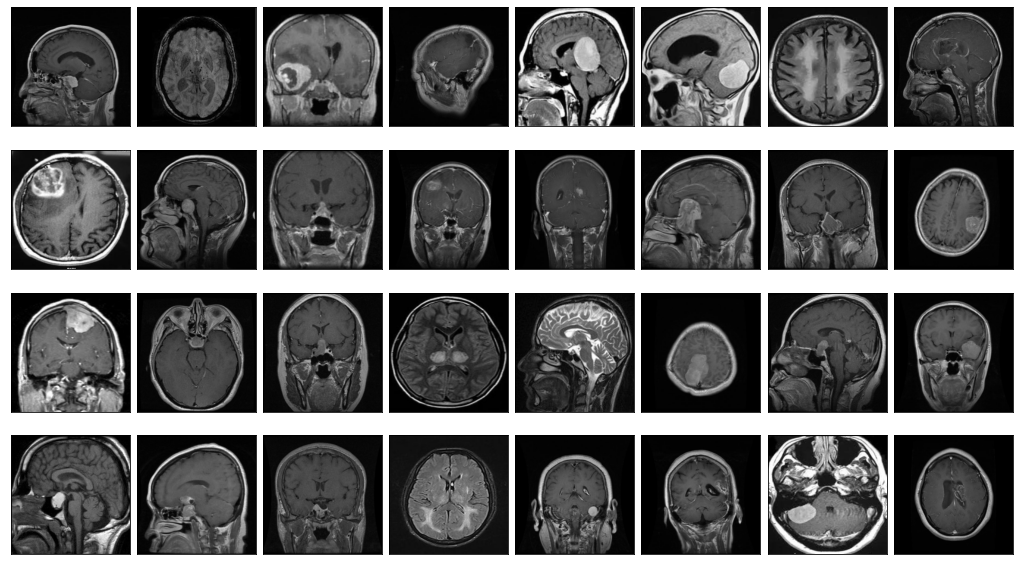

In [4]:
%matplotlib inline
plt.figure(figsize=(20,20))
for i in range(1,33):
    plt.subplot(4,8,i)
    plt.imshow(image_data[i-1])
    plt.xticks([])
    plt.yticks([])  
plt.subplots_adjust(left=0.1, bottom=0.5, right=0.8, wspace=0.01)
plt.show()

In [5]:
image_data = image_data.reshape(image_data.shape[0],-1)

In [7]:
def PCAPredict(X, k):
    
    pca = PCA(n_components=k)
    X_new = pca.fit_transform(X)  
    #Variance = pca.explained_variance_ratio_
    ncomp = pca.n_components_
    return X_new, ncomp

k1 = 0.95
X_new, ncomp = PCAPredict(image_data,k1)
#print(Variance)
print(ncomp)

765


In [44]:
x_train, x_test, y_train, y_test = train_test_split(X_new, label, test_size=0.3, random_state=3)

In [45]:
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [46]:
def logRegrPredict(x_train, y_train,xtest ):
    logreg = LogisticRegression(penalty='l2',C=1.0, solver='lbfgs', max_iter=1000)
    logreg.fit(x_train, y_train)
    y_pred= logreg.predict(xtest)
    return y_pred

y_pred = logRegrPredict(x_train, y_train,x_test)
print('Accuracy on test set: '+str(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))#text report showing the main classification metrics

Accuracy on test set: 0.92
              precision    recall  f1-score   support

    no_tumor       0.77      0.69      0.73       138
   yes_tumor       0.94      0.96      0.95       762

    accuracy                           0.92       900
   macro avg       0.86      0.83      0.84       900
weighted avg       0.92      0.92      0.92       900

